# Practical: PyProj, Shapely, GeoPandas, and Rasterio

**21st November 2019 – 11am to 1pm**

**Christopher Ingold Building G20** 

## PyProj

PyProj is a python interface to PROJ, a cartographic projections and coordinate transformations library. 

If you have not installed PyProj yet, you can quickly install this package from a notebook by executing the next code cell.

In [1]:
!conda install pyproj=2.4

Solving environment: done

# All requested packages already installed.



Using PyProj we can import a Coordinate Reference System object (CRS) which will allow us to get a reference system in various way.

In [2]:
from pyproj import CRS

For example to get the WGS 84, we can use its EPSG id:

In [3]:
crs = CRS.from_epsg(4326)
crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Or, using its full string:

In [4]:
CRS.from_string("epsg:4326")

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

To transform coordinates from a CRS to another CRS we can use the Transform object of PyProj.

In [5]:
from pyproj import Transformer

Once imported we can define a transformer object in different ways. For example, using CRS objects:

In [6]:
wsg84 = CRS.from_epsg(4326)
osgb36 = CRS.from_epsg(27700)
transformer = Transformer.from_crs(wsg84, osgb36)

Or, by using EPSG ids:

In [7]:
transformer = Transformer.from_crs(4326, 27700)

Or, by using EPSG strings:

In [8]:
transfomer = Transformer.from_crs("EPSG:4326", "EPSG:27700")

The `Transfomer` class implements a `transfom` method that allows the transformation of the coordinates in the first CRS to the second CRS:

In [9]:
transfomer.transform(51.5074, 0.1278)

(547765.8625470925, 180864.81984323217)

## Shapely

Shapely is a Python library for the manipulation and analysis of planar geometric objects. 

If you have not installed this yet, you can execute the following code cell:

In [10]:
!conda install -y shapely=1.6

Solving environment: done

# All requested packages already installed.



### Points

With Shapely we can easily create points. 

To create a point object in Shapely we first need to import its class from the geometry module:

In [11]:
from shapely.geometry import Point

To create a point we need to pass to its constructor a pair of coordinate values:

In [12]:
pt1 = Point(0, 0)

To get the coordinates of a point object we can use the `xy` attribute. 
This will return a tuple containing the x and y coordinates of the point as two arrays of length 1.

In [13]:
pt1.xy

(array('d', [0.0]), array('d', [0.0]))

Given two points, we can compute their distance using the `distance` method available in every instance the `Geometry`  class and its children classes. The Point class is a child of the `Geometry` class.

In [14]:
pt2 = Point(1, 1)
pt1.distance(pt2)

1.4142135623730951

### LineString

`LineString`s are used to represent a series of segments all connect to each other. 

In order to use `LineString`s we first need to import the `LineString` class from the geometry module of Shapely:

In [15]:
from shapely.geometry import LineString

If we want to create just a segment, we just need to pass a list of two pair of coordinates to the `LineString` constructor:

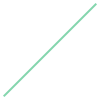

In [16]:
line = LineString([(0, 0), (1, 1)])
line

Or, we can pass a list of points:

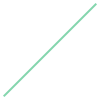

In [17]:
line = LineString([pt1, pt2])
line

To get the coordinates of this line, like for the point object, we can use the `xy` attribute. However, this time the returning arrays of x and y values will have length 2:

In [18]:
line.xy

(array('d', [0.0, 1.0]), array('d', [0.0, 1.0]))

Also LineStrings, as any geometric object, implements the distance operator. Following a non trivial example of the distance between a point and a line:

In [19]:
pt3 = Point(0.4, 0.5)
line.distance(pt3)

0.07071067811865474

Think about how you would compute this distance manually.

We can create more complex `LineString`s by passing a longer list of points to the `LineString` constructor:

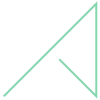

In [20]:
line = LineString([pt1, pt2, (1, 0), (0.6, 0.4)])
line

## Polygon

In Shapely we can also define polygons. 

In [21]:
from shapely.geometry import Polygon

To create a polygon we can pass the same list of coordinates passed to create the previous more complex `LineString`:

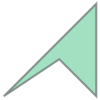

In [22]:
polygon = Polygon([(0, 0), (1, 1), (1, 0), (0.6, 0.4)])
polygon

This will create a polygon with an external `LineString` defining its perimeter. To get this `LineString` back, we need to use the `exterior` attribute:

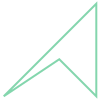

In [23]:
polygon.exterior

If we want to get the coordinates of this `LineString`, we can use the attribute `xy`:

In [24]:
polygon.exterior.xy

(array('d', [0.0, 1.0, 1.0, 0.6, 0.0]), array('d', [0.0, 1.0, 0.0, 0.4, 0.0]))

If we now compare the points we have used to construct the polygon and this exterior `LineString`, we can observe that there is an additional point. This point is added automatically by the `Polygon` constructor in order to assure that the `LineString` is close.

### Plotting Shapely Shapes with Matplotlib

To plot Shapely Shapes using Matplotlib we first need to import the object `matplotlib.pyplot`:

In [25]:
import matplotlib.pyplot as plt

Then, we need to extract the coordinates from a Shapely object we wish to plot in Matplotlib:

In [26]:
x, y = polygon.exterior.xy

At this point, we have all we need to plot in Matplotlib. We can now pass these coordinates to the `fill` method of `plt`. Remember that we use `fill` because we are plotting a polygon. Use `plot` if you want to plot just its perimeter.

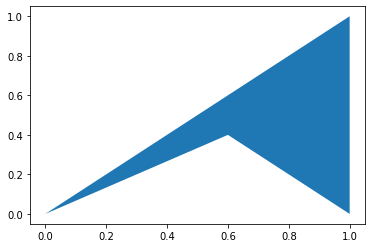

In [27]:
plt.fill(x, y)
plt.show()

### Attributes and Methods of Geometric Objects

Any geometric objects of Shapely provides a series of methods that are useful to compute various geometric properties. These methods are all defined by the parent `Geometry` class. However, their behavior changes based on their specific class. 

For example, to compute the length of a shape:

In [28]:
pt1.length, line.length, polygon.length

(0.0, 2.979898987322333, 3.701009242415131)

To compute the area of a shape:

In [29]:
pt1.area, line.area, polygon.area

(0.0, 0.0, 0.3)

To get the geometric type of an object:

In [30]:
pt1.geom_type, line.geom_type, polygon.geom_type

('Point', 'LineString', 'Polygon')

To compute the distance between two objects:

In [31]:
pt3.distance(line), line.distance(polygon)

(0.07071067811865474, 0.0)

To compute the distance from the two furthest points of the objects:

In [32]:
pt3.hausdorff_distance(line), line.hausdorff_distance(polygon)

(0.7810249675906654, 0.0)

### Topological Relationships

Using Shapely we can easily identify if two objects are touching (their contact point is at their border) or one object is contained in the other one.

To check if two shapes are touching:

In [33]:
polygon.touches(pt1)

True

To verify this, let's plot these two objects:

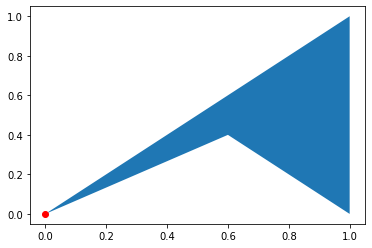

In [34]:
x, y = polygon.exterior.xy
plt.fill(x, y)
x, y = pt1.xy
plt.plot(x, y, 'ro')
plt.show()

However, if we check whether the point is contained by the object we get:

In [35]:
polygon.contains(pt1)

False

Looking at the previous plot, this is clearly correct since the point is on the border of the polygon.

### Geometric Operations

A buffering operation returns a polygon around an object that is offset by a given distance. 

Following some examples:

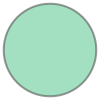

In [36]:
pt1.buffer(1)

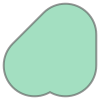

In [37]:
line.buffer(1)

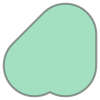

In [38]:
polygon.buffer(1)

We can also perform set operations over polygons.

For example we can compute the intersection of a buffered point and a polygon:

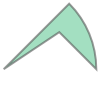

In [39]:
pt1.buffer(1).intersection(polygon)

### Using PyProj on Shapes

To calculate the geodesic length of a Shapely geometry we can use PyProj. To do this we first need to import the Geod class of pyproj:

In [40]:
from pyproj import Geod

Then, let's define two points, one with coordinates centered in London and one with coordinates centered in Brighton both using the WSG 84 CRS:

In [41]:
london = Point(51.5074, 0.1278) 
brighton = Point(50.8225, 0.1372)

We then define a `LineString` between these two points:

In [42]:
line = LineString([Point(51.5074, 0.1278), Point(50.8225, 0.1372)])

Finally, we construct a Geod object with the WGS 84 CRS as a parameter, then use the `geometry_length` method to compute their distance on this geode: 

In [43]:
geod = Geod(ellps="WGS84")
geod.geometry_length(line)

76249.60127116507

# Exercise 30

Use Shapely to solve the Point-In-Polygon problem. 

To solve this exercise you need: 
1. to download the CSV file describing the polygon used for the assignment;
2. define a polygon shape using Shapely;
3. get a point from the user;
3. test whether this point is inside, outside, or on the border of the polygon, and; 
4. plot the solution.

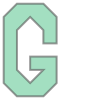

In [44]:
import pandas as pd

df = pd.read_csv("polygon.csv")

polygon = Polygon(df[['x','y']].values)

polygon

In [45]:
print("Plese input the coordinate of the point you want to test:")
x = float(input("x:"))
y = float(input("y:"))

point = Point(x, y)

if point.touches(polygon):
    print("The point is on the border of the polygon.")
elif point.within(polygon):
    print("The point is inside the polygon.")
else:
    print("The point is outside the polygon.")

Plese input the coordinate of the point you want to test:
x:2
y:2
The point is on the border of the polygon.


## GeoPandas

GeoPandas is an open source project to make working with geospatial data in Python easier.

To install GeoPandas you first need to execute the following code cell:

In [46]:
!conda install -y geopandas=0.6

Solving environment: done

# All requested packages already installed.



In [47]:
!conda install -y descartes

Solving environment: done

# All requested packages already installed.



Note that the package descartes is not necessary unless we want to use the plotting functionality of GeoPandas.

GeoPandas is usually imported like this:

In [48]:
import geopandas as gpd

GeoPandas extends the datatypes used by Pandas to allow spatial operations on geometric types. It extends DataFrame into GeoDataFrame and Series into GeoSeries. 

In the following we will work on a dataset of the GeoPandas package. We will now load the Natural Earth in Low Resolution dataset:

In [49]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

On this dataset we can perform all the Pandas operations we have learned in the previous practical, like:

In [50]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


To get the type of each Series:

In [51]:
world.dtypes

pop_est          int64
continent       object
name            object
iso_a3          object
gdp_md_est     float64
geometry      geometry
dtype: object

Here, we observe that this GeoDataFrame contains a "geometry" GeoSeries containing Shapely geometry objects. GeoPandas supports any kind of Shapely geometry object.

A GeoDataFrame needs always to have a GeoSeries indicated as geometry. This is the GeoSeries on which GeoPandas will perform the geospatial operations when called on a DataFrame. To know which column in the GeoDataFrame is the column indicated as geometry we can type:

In [52]:
world.geometry.name

'geometry'

To set another column as the geometry one, we need to type:

In [53]:
world = world.set_geometry("geometry")

Any geospatial operation performed on a DataFrame will be always executed on the geometry GeoSeries. For example, when calling plot, GeoPandas will plot the content of the GeoSeries indicated as geometry: 

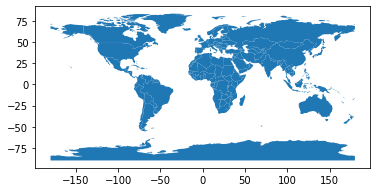

In [54]:
world.plot()

To get the current CRS of this GeoDataFrame we can use the `crs` attribute:

In [55]:
world.crs

{'init': 'epsg:4326'}

Let's now select and plot the United Kingdom shape:

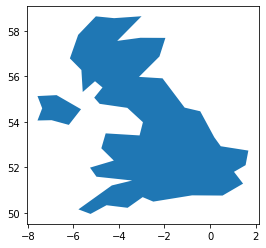

In [56]:
world[world.name == "United Kingdom"].plot()

Does it look like expected?

To change CRS to the British National Grid we can use the `to_crs` method with the appropriate OSPG id:

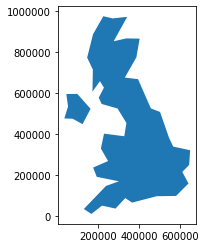

In [57]:
world.to_crs(27700)[world.name == "United Kingdom"].plot()

We can compute the area of each polygon:

In [58]:
world.area

0         1.639511
1        76.301964
2         8.603984
3      1712.995228
4      1122.281921
          ...     
172       8.604719
173       1.479321
174       1.231641
175       0.639000
176      51.196106
Length: 177, dtype: float64

Or, their bounds:

In [59]:
world.bounds

,minx,miny,maxx,maxy
0,-180.000000,-18.287990,180.000000,-16.020882
1,29.339998,-11.720938,40.316590,-0.950000
2,-17.063423,20.999752,-8.665124,27.656426
3,-140.997780,41.675105,-52.648099,83.233240
4,-171.791111,18.916190,-66.964660,71.357764
...,...,...,...,...
172,18.829825,42.245224,22.986019,46.171730
173,18.450017,41.877551,20.339800,43.523840
174,20.070700,41.847110,21.775050,43.272050
175,-61.950000,10.000000,-60.895000,10.890000


Or, their total bound:

In [60]:
world.total_bounds

array([-180.     ,  -90.     ,  180.     ,   83.64513])

Or, compute the centroid (point) of each entry:

In [61]:
world.centroid

0      POINT (163.85316 -17.31631)
1        POINT (34.75299 -6.25773)
2       POINT (-12.13783 24.29117)
3       POINT (-98.14238 61.46908)
4      POINT (-112.59944 45.70563)
                  ...             
172      POINT (20.81965 44.23304)
173      POINT (19.28618 42.78904)
174      POINT (20.89536 42.57937)
175     POINT (-61.33037 10.42824)
176       POINT (30.19862 7.29289)
Length: 177, dtype: geometry

Or, to compute the representative point of each entry:

In [62]:
world.representative_point()

0      POINT (177.97595 -17.93762)
1        POINT (34.14207 -6.20783)
2       POINT (-12.57202 24.23056)
3      POINT (-110.24381 56.70192)
4       POINT (-99.31483 37.23675)
                  ...             
172      POINT (21.01348 44.13670)
173      POINT (19.39622 42.75050)
174      POINT (20.91367 42.51393)
175     POINT (-61.29035 10.56250)
176       POINT (28.97007 8.02715)
Length: 177, dtype: geometry

Or, return the geometric type of each entry:

In [63]:
world.geom_type

0      MultiPolygon
1           Polygon
2           Polygon
3      MultiPolygon
4      MultiPolygon
           ...     
172         Polygon
173         Polygon
174         Polygon
175         Polygon
176         Polygon
Length: 177, dtype: object

Or, compute the distance between a point and each entry of the GeoDataFrame:

In [64]:
pt0 = Point(0, 0)

world.distance(pt0)

0      178.168877
1       29.683081
2       24.940040
3       70.661667
4       80.574034
          ...    
172     47.363500
173     46.124002
174     46.645831
175     61.768004
176     25.394636
Length: 177, dtype: float64

# Exercise 31

Like Exercise 30, but this time use GeoPandas to test every point provided in the CSV file of the assignment.

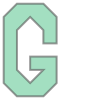

In [65]:
polygon = Polygon(df[['x','y']].values)

polygon

In [66]:
points = pd.read_csv("input.csv")
points = gpd.GeoDataFrame(points, geometry=gpd.points_from_xy(points.x, points.y))
points

,id,x,y,geometry
0,1,1.0,5.5,POINT (1.00000 5.50000)
1,2,-1.0,0.5,POINT (-1.00000 0.50000)
2,3,2.5,3.5,POINT (2.50000 3.50000)
3,4,1.5,5.5,POINT (1.50000 5.50000)
4,5,0.5,5.5,POINT (0.50000 5.50000)
...,...,...,...,...
95,96,3.0,1.0,POINT (3.00000 1.00000)
96,97,5.0,4.5,POINT (5.00000 4.50000)
97,98,4.0,5.5,POINT (4.00000 5.50000)
98,99,-1.0,-1.0,POINT (-1.00000 -1.00000)


In [67]:
points["classification"] = "outside"
points.loc[points.touches(polygon), "classification"] = "boundary"
points.loc[points.within(polygon), "classification"] = "inside"

points

,id,x,y,geometry,classification
0,1,1.0,5.5,POINT (1.00000 5.50000),inside
1,2,-1.0,0.5,POINT (-1.00000 0.50000),outside
2,3,2.5,3.5,POINT (2.50000 3.50000),outside
3,4,1.5,5.5,POINT (1.50000 5.50000),boundary
4,5,0.5,5.5,POINT (0.50000 5.50000),inside
...,...,...,...,...,...
95,96,3.0,1.0,POINT (3.00000 1.00000),inside
96,97,5.0,4.5,POINT (5.00000 4.50000),outside
97,98,4.0,5.5,POINT (4.00000 5.50000),boundary
98,99,-1.0,-1.0,POINT (-1.00000 -1.00000),outside


## Rasterio

Rasterio is a library that allows the access to raster data. Rasterio can manipulate various raster file formats and provides a Python API based on NumPy arrays. 

To install rasterio we need to execute:

In [68]:
!conda install -y rasterio=1.1

Solving environment: done

# All requested packages already installed.



Rasterio is usually imported like this:

In [69]:
import rasterio

In order to use Rasterio we need to load a GeoTiff. We will use the GeoTif downloaded from Digimap rapresenting the Land Cover of UK sampled in 2015. More details about this dataset can be found at this [link](https://digimap.edina.ac.uk/webhelp/environment/environmentdigimaphelp.htm#data_information/lcm2015.htm).

We can load this raster file like this:

In [70]:
dataset = rasterio.open("land_cover_map_2015_uk.tif")

To know which CRS is currently in use:

In [71]:
dataset.crs

CRS.from_epsg(27700)

To quickly have a look at this raster data we can use the method show:

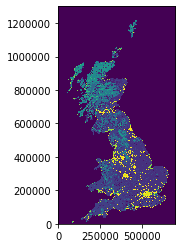

In [72]:
from rasterio import plot

rasterio.plot.show(dataset)

Raster data are stored in layers. To know how many layers this dataset contains, we can use the count attribute of the dataset:

In [73]:
dataset.count

1

To know how wide is this raster in pixels:

In [74]:
dataset.width

700

To know how tall is this raster in pixels:

In [75]:
dataset.height

1300

To know the data type of this raster:

In [76]:
dataset.dtypes

('uint8',)

To know the bounds in the current CRS: 

In [77]:
dataset.bounds

BoundingBox(left=0.0, bottom=0.0, right=700000.0, top=1300000.0)

To access the value of this raster as a NumPy array, we can use the `read` method. Because a raster dataset can have multiple bands (layers) we need to pass as a parameter the id of the layer we want to read:  

In [78]:
dataset.read(1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

# Exercise 32

Estimate the area (in $m^2$) of each land cover value for the UK.

In [79]:
import numpy as np

matrix = dataset.read(1)

land_covers, counts = np.unique(matrix, return_counts=True)

for n in range(len(land_covers)):
    if n != 0:
        print(land_covers[n], counts[n], counts[n] * dataset.transform[0]**2, "m2")
        counts[n] * dataset.transform[0]**2

1 6232 6232000000.0 m2
2 14561 14561000000.0 m2
3 62353 62353000000.0 m2
4 74761 74761000000.0 m2
5 290 290000000.0 m2
6 587 587000000.0 m2
7 21533 21533000000.0 m2
8 115 115000000.0 m2
9 9652 9652000000.0 m2
10 16259 16259000000.0 m2
11 8685 8685000000.0 m2
12 1536 1536000000.0 m2
13 3360 3360000000.0 m2
14 1594 1594000000.0 m2
15 904 904000000.0 m2
16 751 751000000.0 m2
17 749 749000000.0 m2
18 3376 3376000000.0 m2
19 642 642000000.0 m2
20 3138 3138000000.0 m2
21 11586 11586000000.0 m2
